# Primera parte
---
## Herramientas que vamos a utilizar en Colab

*  [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
*  [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*  [Transformers](https://huggingface.co/docs/transformers/index)
---

# [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
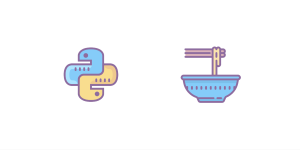
---
* BeautifulSoup 4 (bs4) es una biblioteca de Python utilizada para el web scraping y el análisis de páginas web HTML/XML.
* Proporciona una forma sencilla de extraer datos específicos de páginas web, permitiendo a los desarrolladores navegar a través del marcado HTML, identificar elementos deseados y acceder a su contenido o atributos.
* Es ampliamente utilizada para extraer información de sitios web.
---




periodico


In [1]:
#Esta línea importa la clase BeautifulSoup de la biblioteca bs4 y le asigna un alias 'bs'
from bs4 import BeautifulSoup as bs
#Esta línea importa la biblioteca requests, que se utiliza para realizar solicitudes HTTP a páginas web
import requests

In [59]:
# Se establece un encabezado HTTP para simular un navegador web (User-Agent) en la solicitud.
headers = {"user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36"}
# Se hace una solicitud GET a la URL proporcionada con el encabezado especificado.
url = requests.get('https://e00-elmundo.uecdn.es/elmundo/rss/espana.xml', headers)
#https://e00-elmundo.uecdn.es/elmundo/rss/espana.xml
##https://feeds.elpais.com/mrss-s/pages/ep/site/elpais.com/section/sociedad/portada
# Se utiliza BeautifulSoup para analizar el contenido de la respuesta XML.
soup1 = bs(url.content, 'xml')

In [ ]:
# Busca todos los elementos <entry> en el documento HTML y los almacena en la variable 'datas'.
datas = soup1.find_all('item')
# Inicializa una lista vacía llamada 'entry' para almacenar la información extraída.
periodico = []
# Itera a través de cada elemento <entry> en 'datas'.
for data in datas:
  # Extrae el texto del elemento 'title' dentro de 'data' y lo almacena en 'title'.
  title = data.title.text
  # Extrae el texto del elemento 'published' dentro de 'data' y lo almacena en 'published'.
  published = data.pubDate.text
  # Extrae el texto del elemento 'link' dentro de 'data' y lo almacena en 'link'.
  link = data.link.text
  # Extrae el texto del elemento 'creator' dentro de 'data' y lo almacena en 'creator'.
  creator = data.creator.text
  # Extrae el texto del elemento 'description' dentro de 'data' y lo almacena en 'description'.
  description = data.description.text
  # Agrega una tupla con los valores extraídos a la lista 'entry'.
  periodico.append((title, published, link, creator, description))
  # Imprime los valores extraídos para cada elemento <entry> con formato.
  print(f"Título:{title}",
        f"\n Publicado: {published}",
        f"\n Enlace: {link}",
        f"\n Author: {creator}",
        f"\n Resumen: {description}",
        f"\n .......................")

review

In [92]:
link = requests.get('https://es.trustpilot.com/review/www.ryanair.com?page={}', headers)
soup2 = bs(link.content, 'html')

In [96]:
authors = soup2.find_all('span', {'class':'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'})
titulos = soup2.find_all('h2', {'class': 'typography_heading-s__f7029 typography_appearance-default__AAY17'})
comentarios  = soup2.find_all('p', {'class':'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})

In [ ]:
link = "https://es.trustpilot.com/review/www.ryanair.com?page={}"
start_page=1
end_page=2
reviews = []

for page_num in tqdm(range(start_page, end_page + 1)):
  link_page = link.format(page_num)
  response = requests.get(link_page, headers)
  soup = bs(response.content, "html.parser")
  titulos = soup2.find_all('h2', {'class': 'typography_heading-s__f7029 typography_appearance-default__AAY17'})
  autores = soup2.find_all('span', {'class':'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'})
  textos  = soup2.find_all('p', {'class':'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
  for titulo, autor, texto in zip(titulos, autores, textos):
    title = titulo.text.strip()
    author = autor.text.strip()
    review = texto.text.strip()
    reviews.append((title, author, review))
    print(f"Title:{title}",
          f"\n Author:{author}",
          f"\n Review: {review}",
          f"\n .......................")

# [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
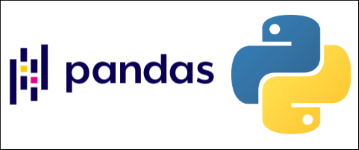
---
### Creación de un DataFrame
---
* Pandas es una poderosa biblioteca de Python utilizada para la manipulación y análisis de datos.
* Ofrece estructuras de datos flexibles como DataFrame, que permiten organizar y procesar datos tabulares de manera eficiente.
* Pandas se utiliza ampliamente en el campo del análisis de datos, permitiendo operaciones como filtrado, agregación y transformación de datos de manera intuitiva.
---

In [49]:
# Importa la biblioteca "pandas" y la renombra como "pd"
import pandas as pd
# Importa la función "tqdm" desde la biblioteca "tqdm"
from tqdm import tqdm
# Configura "tqdm" para su uso con objetos "pandas"
tqdm.pandas()

In [112]:
# Se crea un DataFrame llamado "df" a partir de la variable "entries" con las siguientes columnas: 'Title', 'Summary', 'Published', 'Category','Subject', 'Media', 'Link'
articulo = pd.DataFrame(periodico, columns=['Title', 'Publicado', 'Enlace', 'Author', 'Resumen'])
opiniones = pd.DataFrame(reviews, columns=['Title', 'Author', 'Review'])

In [ ]:
# Muestra las primeras filas del DataFrame 'df'
articulo.head()

In [ ]:
opiniones.head()

# [Sentiment Analysis](https://huggingface.co/models)
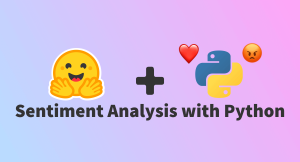
---
* El análisis de sentimiento es una técnica de procesamiento de lenguaje natural que evalúa y determina la emoción o el tono de un texto, generalmente clasificándolo como positivo, negativo o neutro.
* Este proceso ayuda a comprender la opinión, el estado de ánimo o la actitud de los autores hacia un tema específico y se utiliza ampliamente en aplicaciones como la análisis de opiniones de clientes, el monitoreo de redes sociales y la evaluación de reseñas de productos.
* El análisis de sentimiento se basa en algoritmos de aprendizaje automático y procesamiento lingüístico para realizar estas evaluaciones de manera automática.
---





In [ ]:
# Instalar la biblioteca "transformers"
!pip install transformers
# Instalar la biblioteca "sentencepiece"
!pip install sentencepiece

In [64]:
# Esta biblioteca se utiliza comúnmente en el procesamiento del lenguaje natural (NLP) y el aprendizaje automático
from transformers import pipeline

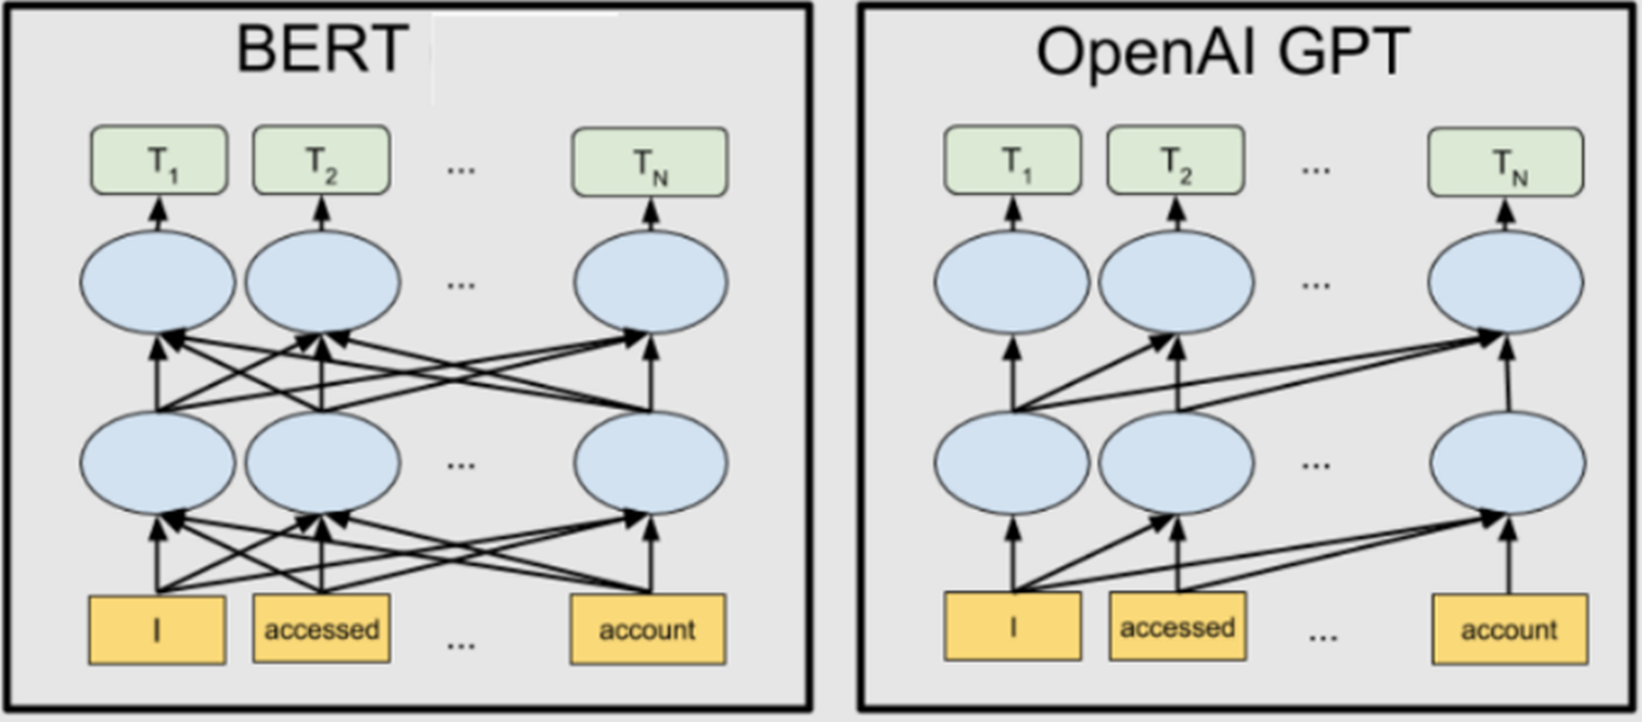

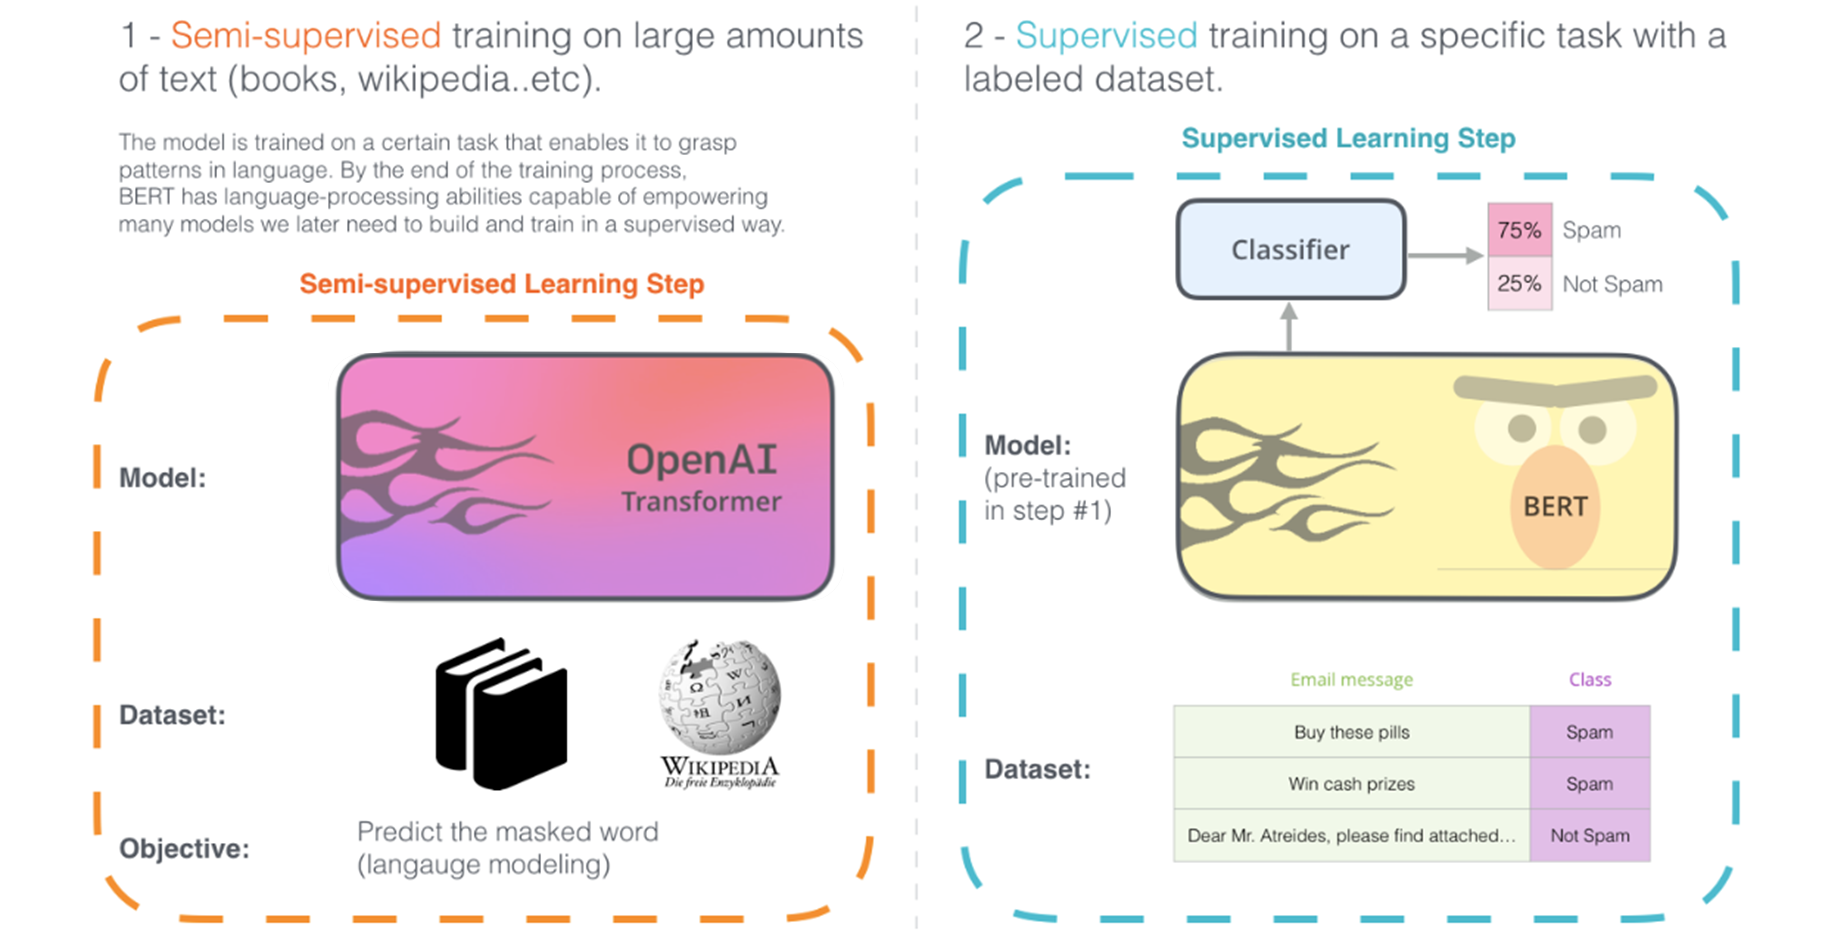

In [71]:
# Ruta al modelo pre-entrenado de análisis de sentimientos en Twitter
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# Crear un clasificador utilizando el modelo y el tokenizador especificados
classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
# un ejemplo
classifier('La fascinación por la misteriosa tumba de la era de Alejandro Magno')

In [90]:
def get_sentiment(text):
    # Esta línea llama a una función "classifier" con el texto proporcionado como entrada y almacena los resultados en la variable "results".
    results = classifier(text)
    # Aquí se obtiene la etiqueta de sentimiento del primer resultado en "results" y se almacena en "sentiment_label".
    sentiment_label = results[0]['label']
    # Esta línea obtiene el valor de sentimiento del primer resultado en "results" y lo almacena en "sentiment_value".
    sentiment_value = results[0]['score']
    # Finalmente, la función devuelve la etiqueta de sentimiento y el valor de sentimiento como una tupla.
    return sentiment_label, sentiment_value

In [ ]:
# Estas líneas de código realizan dos operaciones en el DataFrame 'df':
# 1. Utilizan la función 'progress_apply' en la columna 'Title' para aplicar la función 'get_sentiment' a cada fila.
# 2. Luego, aplican la función 'pd.Series' a los resultados de 'get_sentiment', creando así dos nuevas columnas en el DataFrame 'df'.
#    Estas columnas se llaman 'sentiment_label' y 'sentiment_value'.
articulo[['sentiment_label', 'sentiment_value']] = articulo['Resumen'].progress_apply(get_sentiment).apply(pd.Series)
opiniones[['sentiment_label', 'sentiment_value']] = opiniones['Review'].progress_apply(get_sentiment).apply(pd.Series)

In [ ]:
opiniones.head()

In [ ]:
opiniones['sentiment_label'].value_counts()

# Segunda parte
---
### Exportar los datos

---
Herramientas que vamos a utilizar

*  [Flourish](https://app.flourish.studio/projects)
*  [Voyant-tools](https://voyant-tools.org/)
*  [DataWrapper](https://app.datawrapper.de/)
---

In [ ]:
# exporta los datos contenidos en 'df' a un archivo de Excel para que puedas guardar y compartir tu información en formato de hoja de cálculo de Excel.
articulo.to_excel('articulo.xlsx')
opiniones.to_excel('opiniones.xlsx')